In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [3]:
df = pd.read_csv('./data/SR99_VDS1005210_2016_fill.csv', delimiter=';', parse_dates=True, index_col='datetime')

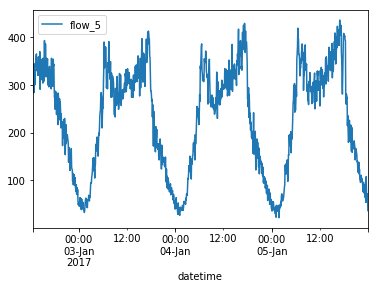

flow_5    106848
dtype: int64

In [4]:
df[-1000:].plot()
plt.show()
df.count()

In [14]:
def test_stationarity(timeseries):
    # 平稳性检测
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.1:
        print('Stationarity')
        return True
    else:
        print('Not Stationarity')
        return False

In [9]:
timeseries = df.values.flatten()

In [17]:
test_stationarity(timeseries[:500])

Results of Dickey-Fuller Test
Test Statistic                  -1.940026
p-value                          0.313472
#Lags Used                      18.000000
Number of Observations Used    481.000000
Critical Value (5%)             -2.867568
Critical Value (1%)             -3.444018
Critical Value (10%)            -2.569980
dtype: float64
Not Stationarity


False

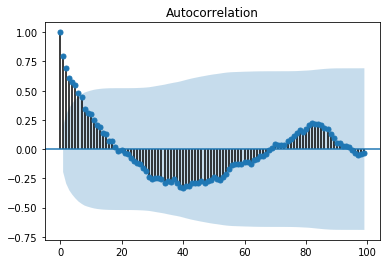

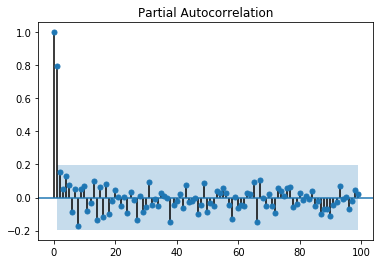

In [19]:
fig = plt.figure(figsize=(16,4))
plot_acf(timeseries[: 100])
plot_pacf(timeseries[: 100])
plt.show()

In [35]:
series_diff = df.flow_5.diff(2016)[2016:] # 差分，减去上一周的数据

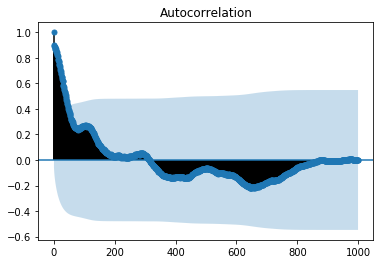

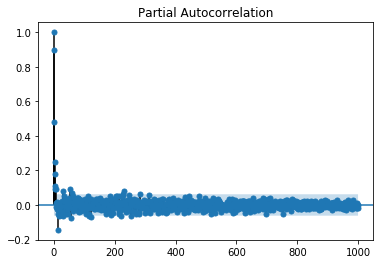

In [42]:
fig = plt.figure(figsize=(16,4))
plot_acf(series_diff[: 1000])
plot_pacf(series_diff[: 1000])
plt.show()

# 开始实验

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
df['2016-08': '2016-10']

,flow_5
datetime,
2016-08-01 00:00:00,69.0
2016-08-01 00:05:00,55.0
2016-08-01 00:10:00,91.0
2016-08-01 00:15:00,72.0
2016-08-01 00:20:00,67.0
2016-08-01 00:25:00,62.0
2016-08-01 00:30:00,53.0
2016-08-01 00:35:00,65.0
2016-08-01 00:40:00,49.0


In [27]:
model = ARIMA(df['2016-08': '2016-10'], order=(10,0,1))

In [28]:
model_fit = model.fit(disp=0)

In [29]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 flow_5   No. Observations:                17568
Model:                    ARMA(10, 1)   Log Likelihood              -81564.416
Method:                       css-mle   S.D. of innovations             25.121
Date:                Sun, 15 Apr 2018   AIC                         163154.831
Time:                        20:55:54   BIC                         163255.891
Sample:                    09-01-2016   HQIC                        163188.104
                         - 10-31-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           244.0774      2.149    113.568      0.000     239.865     248.290
ar.L1.flow_5      1.4213      0.008    169.544      0.000       1.405       1.438
ar.L2.flow_5     -0.1408      0.014    -

In [120]:
train = df['2016-08': '2016-10'].values.flatten().tolist()
test = df['2016-11': '2016-12'].values.flatten()
predictions = []
test_num = len(test)
for t in tqdm(range(test_num)):
    model = ARIMA(train, order=(1, 0, 1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0][0]
    predictions.append(yhat)
    train.append(test[t])
    
mape(test, np.array(predictions))


  0%|                                                                             | 2/17568 [00:09<23:09:19,  4.75s/it]Exception KeyError: KeyError(<weakref at 00000000208761D8; to 'tqdm' at 00000000204B0470>,) in <bound method tqdm.__del__ of   0%|                                                                             | 3/17568 [00:30<48:48:16, 10.00s/it]> ignored


KeyboardInterrupt: 

In [58]:
def mape(y_true, y_predict):
    # Mean Absolute Percentage Error
    assert len(y_true) == len(y_predict)
    return np.mean(np.abs(y_true - y_predict)/np.abs(y_true)) * 100

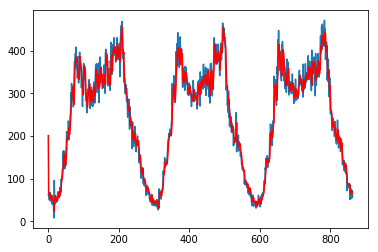

In [116]:
plt.plot(train)
plt.plot(model_fit.fittedvalues, color='red')
plt.show()

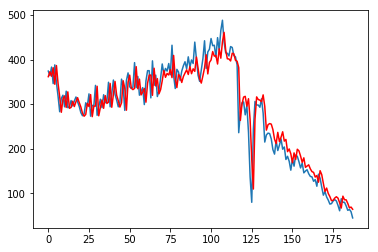

In [150]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [105]:
train = df['2016-10-01': '2016-10-20'].values.flatten().tolist()
test = df['2016-10-21': '2016-10-21'].values.flatten()
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit(disp=0)

In [178]:
train = df['2016-11': '2016-12'].values.flatten()
test = df['2016-11': '2016-12'].values.flatten()[2016:]

In [180]:
predictions = []
test_num = len(test)
for t in tqdm(range(test_num)):
    model = ARIMA(train[t: t+2016], order=(1, 0, 1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0][0]
    predictions.append(yhat)
    
mape(test, np.array(predictions))

  8%|██████                                                                       | 1228/15552 [03:36<42:04,  5.67it/s]

LinAlgError: SVD did not converge